# PROJECT 5 : Customer Segmentation with Clustering

### Project Objective

To use **unsupervised machine learning** to identify distinct groups of customers within a mall's dataset.
By segmenting customers based on multiple dimensions (*income, age, spending habits*), we can provide actionable insights to the marketing team for highly targeted campaigns.

---

#### Core Concepts We'll Cover

1. **Unsupervised Learning**
   - Understanding the difference between supervised and unsupervised learning.

2. **Clustering Fundamentals & K-Means**
   - A deep dive into how the K-Means algorithm works.

3. **The Elbow Method**
   - A critical technique for finding the optimal number of clusters (*k*).

4. **Multi-dimensional EDA**
   - Exploring relationships between features using 2D and 3D plots.

5. **Multiple Segmentation Models**
   - Building and interpreting different clustering models based on different feature sets.

6. **Hierarchical Clustering**
   - A brief introduction to an alternative clustering method.

7. **Data-Driven Personas**
   - Translating.
---


### Theoretical Concept: What is Unsupervised Learning?

So far, we have worked with **supervised learning**, where our datasets had a specific **target variable** we were trying to predict (e.g., *SalePrice*, *Survived*).
In supervised learning, the model **learns the relationship** between features and the known target.

---

#### How Unsupervised Learning is Different

- In **unsupervised learning**, datasets **do not have a target variable**.
- The goal is not to predict a known outcome, but to **discover hidden patterns, structures, and relationships** within the data itself.

---

#### Clustering in Unsupervised Learning

- **Clustering** is the most common type of unsupervised learning.
- The objective is to **group data points into clusters** such that:
  - Points within the same cluster are **very similar** to each other.
  - Points in different clusters are **very dissimilar** from one another.

---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.cluster.hierarchy as sch
from scipy.stats import alpha

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
#set plot style
sns.set_style('whitegrid')

Imagine you have a bunch of unsorted toys (your data points) and you want to group them into different boxes (your clusters) based on
how similar they are. K-Means is like a helper that does this for you!

---
#### 🎲 Understanding K-Means with a Toy Analogy

K-Means is a clustering algorithm that groups data into **k clusters**.
Here’s how it works, step by step:

---

1. **Choose how many boxes you want (Choose *k*)**
   - You decide beforehand how many groups you want to create.
   - Example: If you want 3 boxes, then `k = 3`.

2. **Place some "toy leaders" in the boxes (Initialize centroids)**
   - K-Means randomly picks 3 toys and places one in each box.
   - These toys are the temporary **leaders (centroids)** of their boxes.

3. **Sort the toys by how close they are to the leaders (Assign points to clusters)**
   - K-Means checks every toy and finds the leader it’s closest to.
   - Each toy is placed into the box with its nearest leader.

4. **Find the new average location of the leaders (Update centroids)**
   - Once toys are in boxes, K-Means calculates the **average location** of toys in each box.
   - These averages become the new **leaders (centroids)**.

5. **Repeat until the leaders stop moving (Iterate until convergence)**
   - K-Means keeps repeating steps **3 and 4**.
   - When the leaders (centroids) stop moving much, the groups become stable.
   - Finally, you have toys sorted into **k clusters**, where toys in the same box are more similar to each other than those in other boxes.

---


In [3]:
cust_data = pd.read_csv('Mall_Customers.csv')
cust_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
cust_data.shape

(200, 5)

### STEP 2 : EDA

understanding the features and their relationships to find the most promising dimensions for segmentation.

In [5]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
cust_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### 2.1 Univariate Analysis

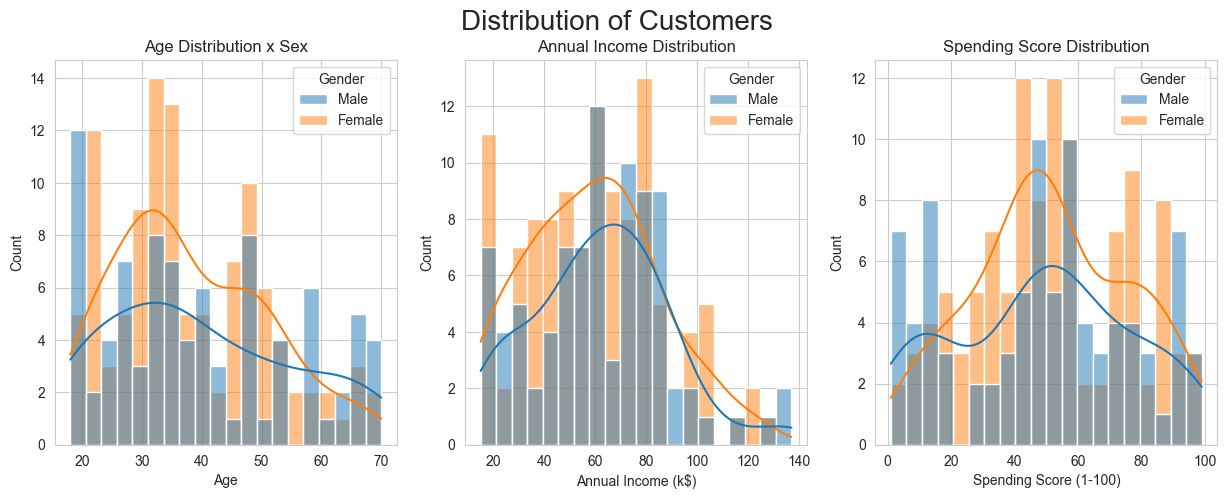

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Distribution of Customers', fontsize=20)

sns.histplot(ax=axes[0], data=cust_data, x='Age', kde=True, bins=20, hue='Gender').set_title('Age Distribution x Sex')
sns.histplot(ax=axes[1], data=cust_data, x='Annual Income (k$)', kde=True, bins=20, hue='Gender').set_title('Annual Income Distribution')
sns.histplot(ax=axes[2], data=cust_data, x='Spending Score (1-100)', kde=True, bins=20, hue='Gender').set_title('Spending Score Distribution')

plt.show()

### 2.2 BiVariate Analysis

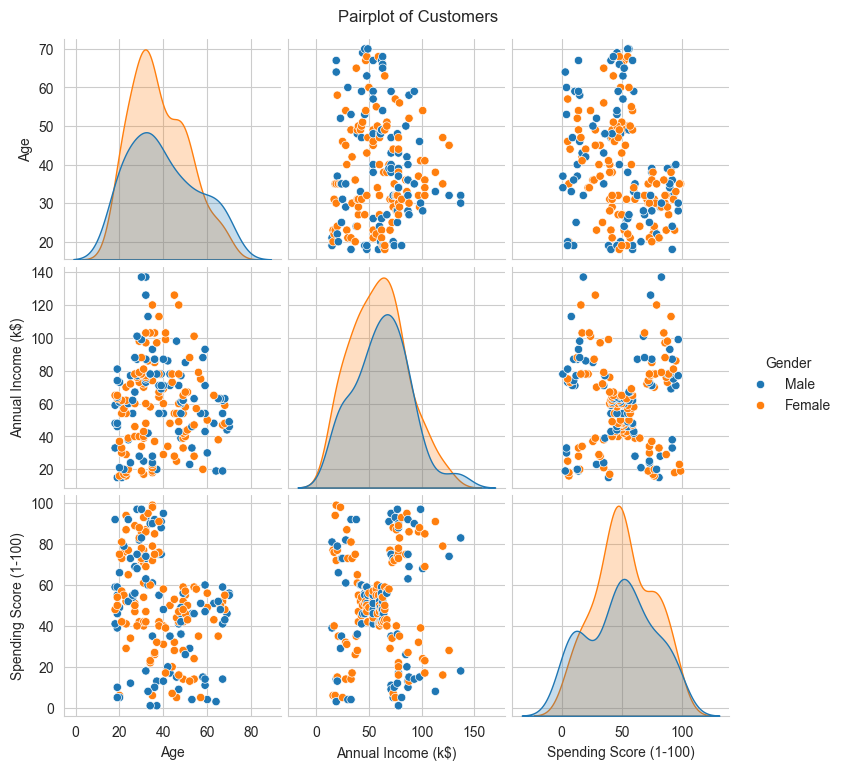

In [8]:
sns.pairplot(cust_data, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], hue='Gender', diag_kind='kde')
plt.suptitle('Pairplot of Customers', y=1.02)
plt.show()

*Critical Insights from Pair Plot*

   -   The *Annual Income VS Spending Score* plot is the most revealing.
   -    The *Age vs Spending Score* plot shows some patterns but they are less defined.
   -    Gender does not appear to be the strong separating factor in any of these plots

### 2.3 3D Visualization

In [9]:
cust_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [10]:
fig = px.scatter_3d(cust_data,
                    x='Annual Income (k$)',
                    y='Spending Score (1-100)',
                    z='Age',
                    color='Gender',
                    title='Annual Income vs Spending Score (1-100)')
fig.show()

### STEP 3 : Segmentation Model 1 - Income & Spending Score

This is our primary segmentation model, focusing on the most promising feature

#### 📉 Theoretical Concept: The Elbow Method

How do we choose the best number of clusters (*k*) for our **K-Means** model?
The **Elbow Method** is one of the most common techniques.

---

##### 🔎 How It Works

1. **Calculate WCSS (Within-Cluster Sum of Squares)**
   - For different values of *k* (typically from 1 to 10).
   - **WCSS** = sum of the squared distances between each point and the centroid of its cluster.
   - Lower WCSS → points are closer to their centroids → tighter clusters.

2. **Plot WCSS vs. Number of Clusters (*k*)**
   - As *k* increases, **WCSS always decreases** (since more clusters = points closer to centroids).
   - However, the decrease is not uniform.

3. **Look for the "Elbow Point"**
   - At some point, adding more clusters doesn’t significantly reduce WCSS.
   - This point looks like an **elbow** in the curve.

4. **Choose Optimal *k***
   - The value of *k* at the elbow point is considered optimal.
   - It balances between:
     - Too few clusters → high WCSS (poor fit).
     - Too many clusters → overfitting and diminishing returns.

---

✅ **In summary:**
The **Elbow Method** finds the point where increasing *k* gives diminishing returns in reducing WCSS.
This "elbow" is the ideal number of clusters for K-Means.

---
###

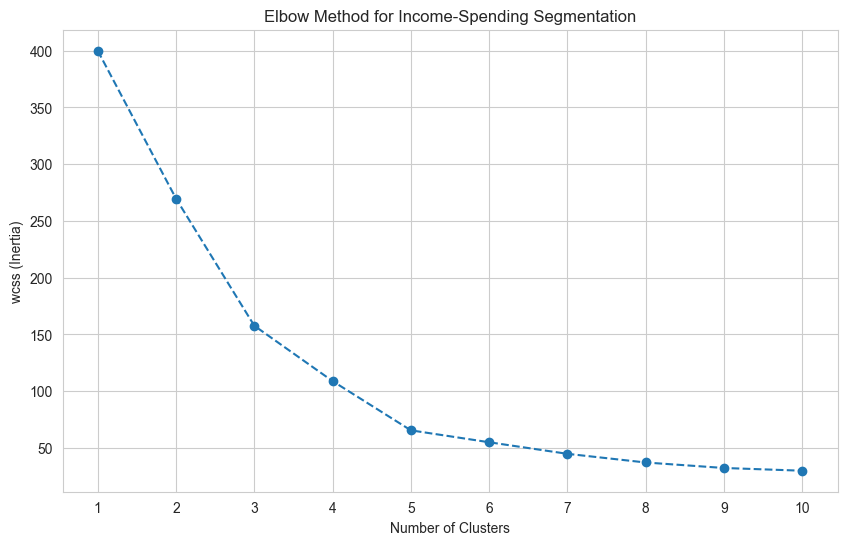

In [11]:
# 1. select and scale the features
x1 = cust_data[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler1 = StandardScaler()
x1_scaled = scaler1.fit_transform(x1)

# 2. Implementing the elbow method
wcss1 = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(x1_scaled)
    wcss1.append(kmeans.inertia_)

# 3. Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss1, marker='o', linestyle='--')
plt.title('Elbow Method for Income-Spending Segmentation')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss (Inertia)')
plt.xticks(range(1, 11))
plt.show()

#### 🎯 Understanding WCSS (Within-Cluster Sum of Squares)

Imagine you've grouped your friends into different **clubs** (these are your clusters).
**WCSS** helps you figure out how *together* or *spread out* the members are within each club.

---

##### 🧩 Key Terms

- **Cluster**: One of the groups you've formed.
- **Centroid**: The "center point" of a cluster (average location of all members in that club).
- **WCSS**:
  - For each cluster, calculate the distance from every member to the cluster’s centroid.
  - Square these distances and add them up.
  - Do this for all clusters and sum the totals.

---

##### 📊 Interpreting WCSS

- **Low WCSS** → Points are very close to their centroid → clusters are **tight and well-defined**.
- **High WCSS** → Points are spread out from their centroid → clusters are **looser and less distinct**.

---

##### 🔗 How WCSS Relates to K-Means

- The **goal of K-Means** is to **minimize WCSS**.
- The algorithm adjusts centroids and reassigns points until the total WCSS is as small as possible.
- The **Elbow Method** uses WCSS to choose the optimal number of clusters (*k*):
  1. Calculate WCSS for different values of *k*.
  2. Plot WCSS against *k*.
  3. Look for the **"elbow point"** → where the rate of decrease slows down.
  4. This point suggests adding more clusters doesn’t significantly improve cluster tightness.

---
###

---

**Observation** : The "Elbow" of the curve is clearly at k = 5. The WCSS decreases sharply until k = 5, and then the rate of decrease flattens out. This Confirms our visual intuition from the scatter plot

---

In [12]:
#build and fit the final model
kmeans1 = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
cust_data['income_cluster'] = kmeans1.fit_predict(x1_scaled)

### ⚙️ Common Initialization Options for K-Means (`init` parameter)

When running **K-Means**, the way centroids are initialized can impact the quality of clustering.
Here are the most common options:

---

##### 1. `'k-means++'` (Default ✅)
- **Recommended method**.
- Smartly initializes the centroids to be **spread out** from each other.
- This significantly improves the chances of finding a **globally optimal solution**.
- Reduces the risk of converging to a **suboptimal local minimum**.

---

##### 2. `'random'`
- Chooses **n_clusters** observations (data points) randomly from the dataset as the initial centroids.
- Simple, but can sometimes lead to **poor clustering results** if the random centroids are not well-separated.

---

##### 3. NumPy Array
- You can explicitly provide a **NumPy array** of shape `(n_clusters, n_features)` that specifies the initial coordinates of centroids.
- Useful when:
  - You have **prior knowledge** of where clusters should be.
  - You want to **replicate a specific initialization** for reproducibility.

---
##

#### 3.1 Visualizaton and Interpretation of the Income-Based Segmentation

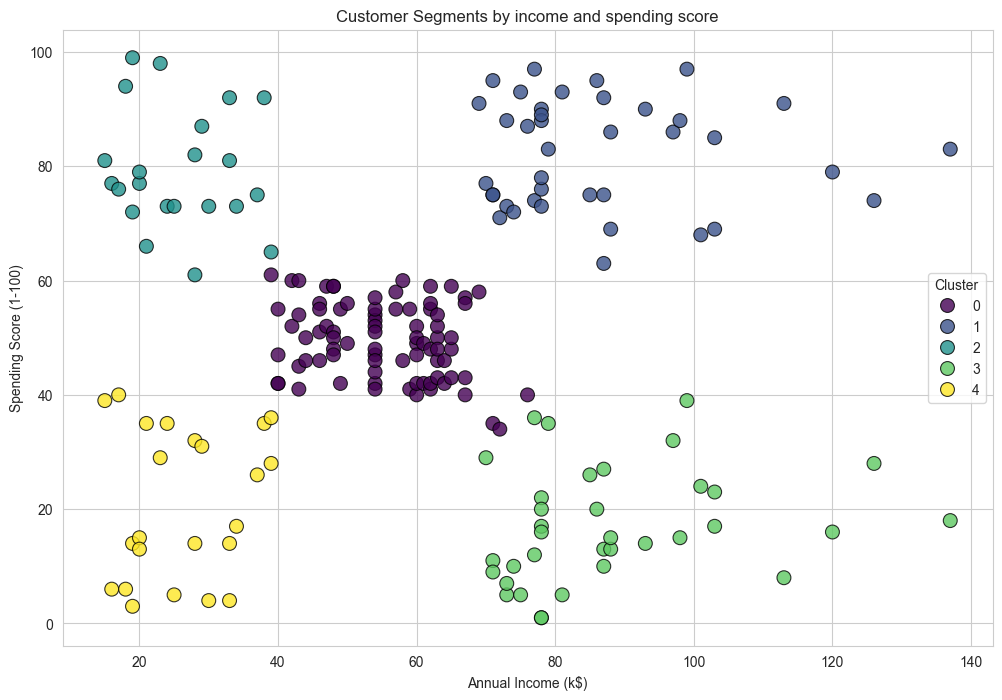

In [13]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=cust_data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='income_cluster', palette='viridis', s = 100, alpha = 0.8, edgecolor='black')

plt.title('Customer Segments by income and spending score')
plt.legend(title='Cluster')
plt.show()

In [14]:
# Quantitative Persona Analysis
cluster_profiles1 = cust_data.groupby('income_cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(0)

cluster_profiles1['size'] = cust_data['income_cluster'].value_counts()

print("--- Income-Based Cluster Profiles ---")
cluster_profiles1

--- Income-Based Cluster Profiles ---


,Age,Annual Income (k$),Spending Score (1-100),size
income_cluster,,,,
0,43.0,55.0,50.0,81
1,33.0,87.0,82.0,39
2,25.0,26.0,79.0,22
3,41.0,88.0,17.0,35
4,45.0,26.0,21.0,23


**Observation**

  *     Cluster 3 (Careful High-Earners) : High income (88%) low spending (17k). Cautious, value-driven buyers
  *     Cluster 0 (Standard) : Average income (55k) and spending (50%). This is largest, core customer group
  *     Cluster 2 (Budget shopers) : low income (25k) and spending (21%), highly price-sensitive
  *     Cluster 1 (Target high) : high income (87k) and spending (82%). The mall's prime target
  *     Cluster 4 (Enthusiasts) : low income(26k) but high spending (79%). likely yound trend-focused shoppers

### Step 4 : Segmentation Model 2 - Age and Spending Score

<span style="font-family : Comic Sans MS"> Let's create a different segmentation model to see if we can find age - related customer groups </span>

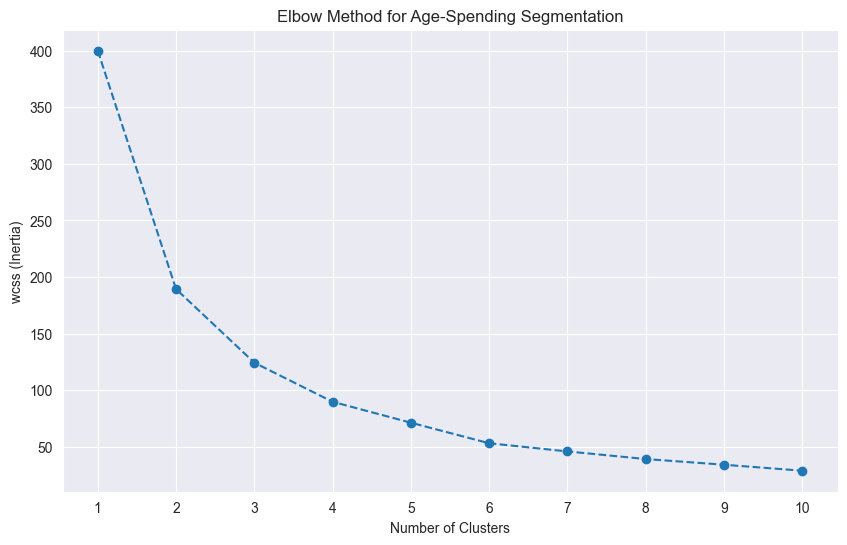

In [15]:
# 1. Select and scale the features
x2 = cust_data[['Age', 'Spending Score (1-100)']]
scaler2 = StandardScaler()
x2_scaled = scaler2.fit_transform(x2)

# 2. Implement the Elbow Method
wcss2 = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(x2_scaled)
    wcss2.append(kmeans.inertia_)

# 3. Plot the ELBOW Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss2, marker='o', linestyle='--')
plt.title('Elbow Method for Age-Spending Segmentation')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss (Inertia)')
plt.xticks(range(1, 11))
plt.show()

In [21]:
#built and fit the final model for age segmentation

kmeans2 = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)
cust_data['age_cluster'] = kmeans2.fit_predict(x2_scaled)



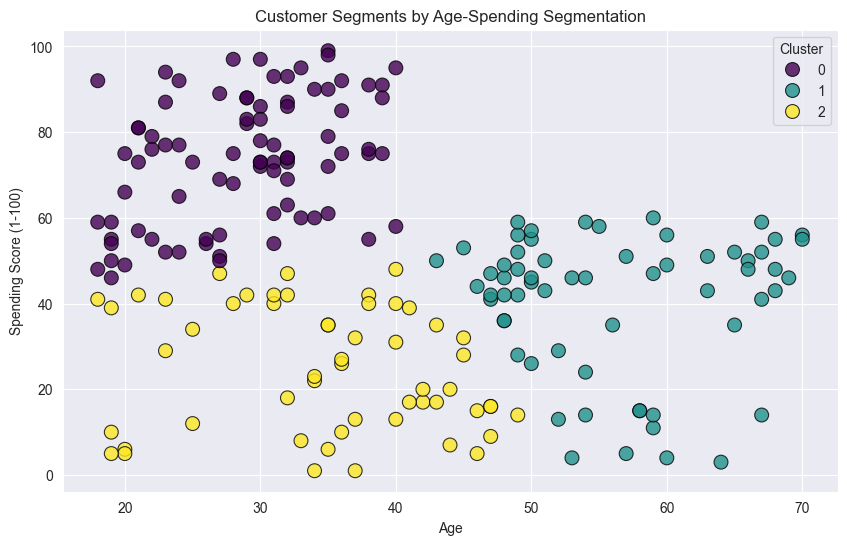

In [22]:
#visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cust_data, x='Age', y='Spending Score (1-100)', hue='age_cluster', palette='viridis', s = 100, alpha = 0.8, edgecolor='black')

plt.title('Customer Segments by Age-Spending Segmentation')
plt.legend(title='Cluster')
plt.show()

This model gives us a different perspective :  <br>

*       Young high-spenders : A clear group of customers under 40 with high spending scores.
*       Young low-spenders : Customers under 40 with low-to-moderate spending.
*       Older Average-Spenders : Customers over 40 with moderate spending scores.
*       Older Low-Spenders : A small group of older customers with very low spending scores.

### STEP 5 : ALTERNATIVE - HIERARCHICAL CLUSTERING

#### 🌳 <span style="color:greenyellow"> Theoretical Concept: </span> Hierarchical Clustering & Dendrograms

Unlike **K-Means**, **Hierarchical Clustering** does **not require specifying the number of clusters beforehand**.
Instead, it builds a **tree-like hierarchy of clusters**.

---

##### 📊 <span style="color:yellow"> Dendrogram Visualization </span>

- A **dendrogram** is used to visualize the hierarchy of clusters.
- It shows how clusters are **merged** (agglomerative) or **split** (divisive).

---

##### 🔎 <span style="color:yellow"> Finding the Optimal Number of Clusters </span>

1. Look for the **tallest vertical line** in the dendrogram that doesn’t cross any horizontal lines.
2. Draw a **horizontal line** through this point.
3. The number of **vertical lines it intersects** = the **optimal number of clusters**.

---

✅ **In summary:**
Hierarchical Clustering + dendrograms help us explore **cluster structures** without predefining *k*.

---
###

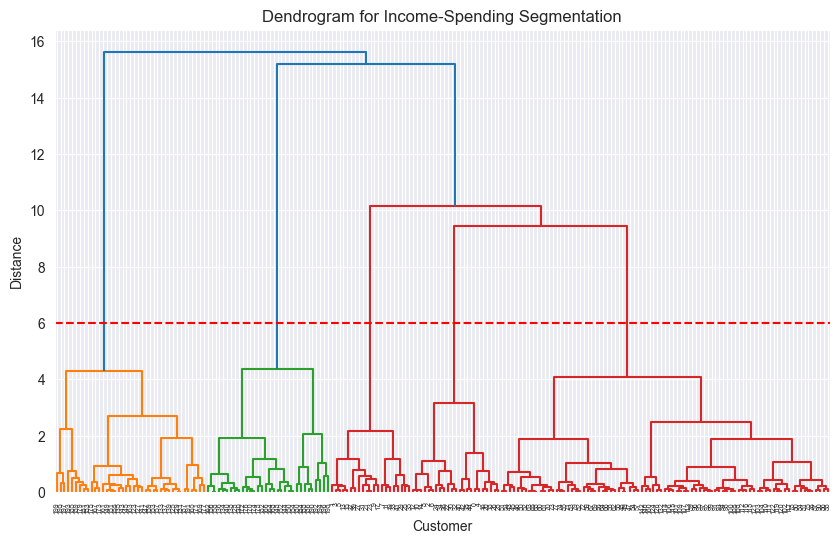

In [18]:
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(x1_scaled, method='ward'))
plt.title('Dendrogram for Income-Spending Segmentation')
plt.xlabel('Customer')
plt.ylabel('Distance')
plt.axhline(y=6, color='r', linestyle='--')
plt.show()

<span style="color:pink"> **Observation** </span>: <br>
        The dendrogram also confirms that 5 clusters in the optimal number for the income-spending data. If we draw a horizontal line at a height of 6, it crosses 5 vertical lines.

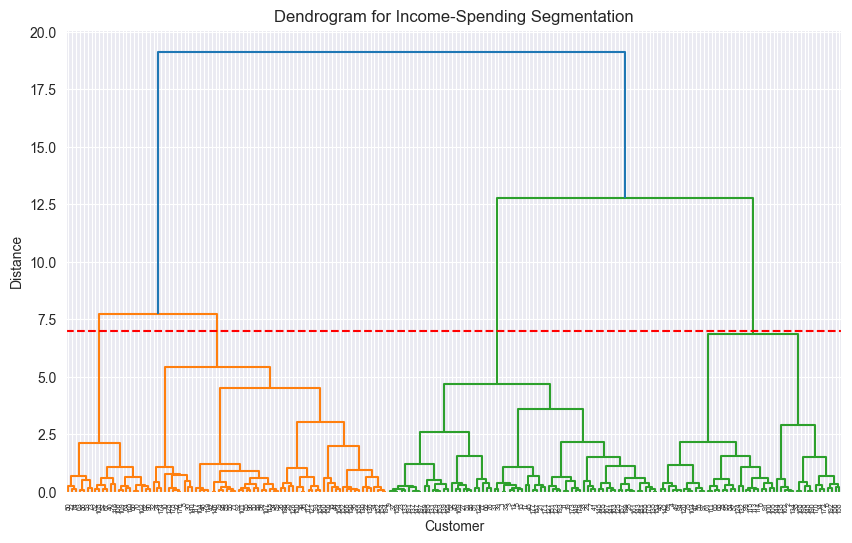

In [20]:
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(x2_scaled, method='ward'))
plt.title('Dendrogram for Income-Spending Segmentation')
plt.xlabel('Customer')
plt.ylabel('Distance')
plt.axhline(y=7, color='r', linestyle='--')
plt.show()

### STEP - 6 : THE CONCLUSION

#### 🏆 Extended Project Summary: Customer Segmentation with Unsupervised Learning

In this extended project, we successfully applied **unsupervised machine learning** to perform **customer segmentation**.

---

##### 🔑 Key Steps Undertaken

1. **Performed an in-depth EDA**
   - Used **2D and 3D plots** to explore customer data from multiple perspectives.

2. **Built two distinct segmentation models**
   - Created an **income-based model** and an **age-based model**.
   - Showed that segmentation is **not a one-size-fits-all** process.

3. **Applied the Elbow Method**
   - Programmatically determined the **optimal number of clusters (k)** for each scenario.

4. **Introduced Hierarchical Clustering**
   - Used its **dendrogram** to validate the chosen value of *k*.

5. **Created data-driven personas**
   - Developed **quantitative, actionable personas** for each segment.
   - Provided the marketing team with **precise insights** for targeted campaigns.

---

##### 📌 Key Takeaway

This project highlights how **different clustering approaches** can uncover **different facets of customer behavior**.
Together, they provide a **richer and more nuanced understanding** than relying on a single model alone.

---
